# <center>Day-2 Practical Session, 26 May 2021</center>
## <center>Part 1: Incidence Weighting Estimator (IWE) under Bipartite Incidence Graph Sampling (BIGS)</center>
#### <center> *Li-Chun Zhang*<sup>1,2,3</sup> and *Melike Oguz-Alper*<sup>2</sup> </center>
  
##### <center> <sup>1</sup>*University of Southampton (L.Zhang@soton.ac.uk)*, <sup>2</sup>*Statistics Norway*, <sup>3</sup>*University of Oslo* </center>
***

### Illustration II: BIGS-IWE strategy: two random graphs with different degree-distributions
In this illustration, we will again compare the efficiencies of several IWE estimators including the priority-rule estimators under BIG sampling. This time, two random population graphs with the same total number of edges, but different out-degree distributions, will be generated. These graphs are generated by using the R-function <font color=green>**skthrndBIG**</font>. 

***
#### Description of the population and sampling strategies
* Population BIG: $\mathcal{B}=(F,\Omega;H)$, $H$ consists of edges between *sampling units* $i\in F$ and *study units* $\kappa\in\Omega$
* Sample BIG: $\mathcal{B}_s=(s_0,\Omega_s;H_s)$ with $s_0\in F$, $\Omega_s=\alpha(s_0)$, and $s_{ref}=s_0\times \Omega$ such that $H_s=H\cap s_{ref}=H\cap(s_0 \times \Omega)$
* $\beta_{\kappa}$: *ancestry* set of $\kappa \in \Omega$ and $\alpha_i$: *successors* of $i \in U$ 
* $s_0$ of size $n$ selected with SRSWOR from sampling frame $F$ of size $N$
*** 


#### Formula sheet
* The parameter of interest: size of $\Omega$: 

    $\theta=\sum_{\kappa\in\Omega}y_{\kappa}$, where $y_{\kappa}=1$ for all $\kappa\in \Omega$

* IWE based on  $\mathcal{B}_s=(s_0,\Omega_s;H_s)$ by BIGS

    $\hat{\theta} = \sum_{(i\kappa) \in H_s} W_{i\kappa} \frac{y_{\kappa}}{\pi_i}$

* Hansen-Hurwitz (HH) type estimators: special case of IWE, *constant* weights

    $\hat{\theta} =  \sum_{i\in s_0}\frac{z_i}{\pi_i}$, where $z_i=\sum_{\kappa \in\alpha_i}w_{i\kappa}y_{\kappa}$, with $\sum_{i\in \beta_{\kappa}}w_{i\kappa}=1$

    * HH-type estimator with *equal* weights: *multiplicity* estimator (Birnbaum and Sirken 1965)
    
        $w_{i\kappa}\equiv \frac{1}{\mid\beta_{\kappa}\mid}$
    
    * HH-type estimator with *unequal* weights: *probability and inverse degree-adjusted (PIDA) weights*
     
        $w_{i\kappa}\propto \frac{\pi_i}{\mid\alpha_i\mid^{\gamma}}$, $\gamma > 0$
        
**NB**. Under SRS of $s_0$ and when $\gamma=0$, the HH-type estimator with PIDA weights become equivalent to the multiplicity estimator above
    
* HTE: a special case of IWE

    $\hat{\theta}_{HT}=\sum_{\kappa\in \Omega_s} \frac{y_{\kappa}}{\pi_{(\kappa)}}$


The first-order inclusion probabilies $\pi_{(\kappa)}=\mathrm{Pr}(\kappa\in\Omega_s)$ can be calculated, under SRS of $s_0$, by

$\pi_{(\kappa)}=1-\bar{\pi}_{\beta_{\kappa}}=1-\binom{N-\mid\beta_{\kappa}\mid}{n}/\binom{N}{n}$, where $\mid\beta_{\kappa}\mid$ is the size of the ancestor set of $\kappa$
    
* Priority-rule estimators with *priority rule* to the sample edges $H_s$: $I_{i\kappa} = 1$ if $i = \min(s_0 \cap \beta_{\kappa})$, and $I_{i\kappa} = 0$ otherwise

    $\hat{\theta}_p = \sum_{(i\kappa)\in H_s} \Big( \frac{I_{i\kappa} \omega_{i\kappa}}{p_{(i\kappa)}} \Big) \frac{y_{\kappa}}{\pi_i}$, where $p_{(i\kappa)} = \mbox{Pr}(I_{i\kappa} =1 | \kappa \in \Omega_s)$
    
The probabilities $p_{(i\kappa)}$ can be calculated, under SRS of $s_0$, by 

$p_{(i\kappa)}=\binom{N-1-d_{i(\kappa)}}{n-1}/\binom{N-1}{n-1}$, where $d_{i(\kappa)}$ the number of nodes with higher probability than $i$ for each $\kappa \in \Omega$ and $i\in \beta_{\kappa}$ for the priority-rule $\min(s_0 \cap \beta_{\kappa})$


***

**NB**. R-package **igraph** has to be installed before running R-functions below that generates random graphs.

***

#### Description of R-function <font color=green>**skthrndBIG**</font>
##### 1. Function parameters
* **sizeF**: number of sampling units in $F$; default value $50$
* **sizeOmega**: number of study units in $\Omega$; default value $100$
* **meanoutdeg**: mean number of out-degrees, $\sum_{i \in F}\alpha_{i}/ \mid F \mid$; default value $10$
* **showplot**: Use <font color=blue>**TRUE**</font> to get histograms of the *uniform* and *skewed* out-degree distributions; default <font color=blue>**FALSE**</font>

##### 2. Main steps of the function
* A random graph generated with exponential degree distribution
* Another random graph with uniform degree distribution generated with the same total number of degrees as in the graph with exponential degree distribution
* Because the number of in- and out-degrees have to be equal in a graph, initial in-degrees are adjusted, so that the total number of in-degrees would become equivalent to the total number of out-degrees. Initial degrees in the graph with uniform degree distribution are also adjusted, so that the total number of degrees in the graph with exponential distribution preserved. Adjustment of degrees is done by compiling R-function <font color=green>**degcorrection**</font> (This function only called in the R-function  <font color=green>**skthrndBIG**</font>. Thus user input not needed). 


##### 3. Main outputs of the function
* Histograms for uniform and exponential degree distributions shown if **showplot**=  <font color=blue>**TRUE**</font>
* A list of two random graphs generated: Use $\boldsymbol{\mathrm{Guniform}}$ and $\boldsymbol{\mathrm{Gskewed}}$ to get the graphs with uniform and exponential distributions, respectively


#### Description of R-function <font color=green>**zFun**</font>
##### 1. Function parameters
* **popgraph**: population graph to be used: outputs of <font color=green>**skthrndBIG**</font>
* **coefgamma**: coefficient to be used in the HH-type estimator with PIDA weights; default value $0$. No effect of the choice if **multiplicity**= <font color=blue>**TRUE**</font>
* **n**: sample size of initial sample $s_0$; default value $2$
* **multiplicity**: Use <font color=blue>**TRUE**</font> to get $z_i$ values based on equal weights, i.e. $w_{i\kappa}=\mid\beta_{\kappa}\mid^{-1}$; default <font color=blue>**FALSE**</font>

##### 2. Main steps of the function
* Edge set derived from the population graph, as well as the labels of the vertices in $F$ and $\Omega$
* $\mid \alpha_i \mid$ and $\mid \beta_{\kappa}\mid$ calculated based on the edge set
* $z_i$ values calculated for all $i\in F$ for chosen values of $\gamma$

##### 3. Main outputs of the function
* $z_i$ values returned


#### Description of R-function <font color=green>**mainsimBIGSIWE**</font>
##### 1. Function parameters
* **popgraph**: population graph to be used: use the outputs of the function <font color=green>**skthrndBIG**</font>
* **coefgamma**: coefficient to be used in the HH-type estimator with PIDA weights; default value $0$
* **n**: sample size of initial sample $s_0$; default value $2$
* **B**: number of Monte-Carlo replications; default value $50$

##### 2. Main steps of the function
* Edge set derived from the population graph, as well as the labels of the vertices in $F$ and $\Omega$
* $\mid \alpha_i \mid$ and $\mid \beta_{\kappa}\mid$ calculated based on the edge set
* Inclusion probabilities $\pi_{(\kappa)}$ calculated based on $\mid \beta_{\kappa}\mid$
* $B$ random samples of size $n$ selected with SRS from $F$
* For each random sample, estimates obtained from the HTE, the HH-type estimator and the priority-rule estimator. For the last one, three random orderings of out-degrees, i.e. $\alpha_i$, considered: *random*, *ascending* and *descending*

##### 3. Main outputs of the function
* Empirical standard deviations of the HH-type estimates and the priority-rule estimates 
* Empirical relative efficiencies the HH-type estimators and the priority-rule estimators against the HTE
***

In [88]:
# Load package -igraph-
library(igraph)

In [89]:
# To make total number of in and out-degrees equal
degcorrection <- function(controldeg,targetdeg){
  check=as.numeric(sum(targetdeg)!=sum(controldeg))
  while(check==1){
    if(sum(targetdeg)>sum(controldeg)){diff <- sum(targetdeg)-sum(controldeg)
    selones <- targetdeg==1
    targetdeg[!selones] <- trunc(targetdeg[!selones]*(sum(controldeg)-sum(selones))/(sum(targetdeg)-sum(selones)))
    }
    
    if(sum(targetdeg)<sum(controldeg)){diff <- sum(controldeg)-sum(targetdeg)
    sel <- sample(1:length(targetdeg),diff,replace=TRUE,prob=targetdeg)
    targetdeg[unique(sel[order(sel)])] <- targetdeg[unique(sel[order(sel)])] + as.vector(table(sel))
    }
    check=as.numeric(sum(targetdeg)!=sum(controldeg))
  }
  return(targetdeg)
}

# Generate two random graphs with deg. dist.: uniform and skewed
skthrndBIG <- function(sizeF=50,sizeOmega=100,meanoutdeg=10,showplot=FALSE){
  ## Exponential degree distribution
  set.seed(260521)
  out_degs_exp <- sample(1:sizeF, sizeF, replace=TRUE, prob=exp(-(1/meanoutdeg)*(1:sizeF)))
 
  
  meanindeg <- trunc(sum(out_degs_exp)/sizeOmega+0.5)
  set.seed(260521)
  in_degs <- sample(1:sizeOmega, sizeOmega, replace=TRUE, prob=exp(-(1/meanindeg)*(1:sizeOmega)))
  in_degs <- degcorrection(out_degs_exp,in_degs)   
  
  
  set.seed(260521)
  grnd <- sample_degseq(out.deg=c(out_degs_exp,rep(0,length(in_degs))),in.deg = c(rep(0,length(out_degs_exp)),in_degs))
  g_exp <- make_empty_graph(n=length(V(grnd)))
  g_exp <- add_edges(g_exp,edges=c(t(unique(as_edgelist(grnd)))))
  
  ## Uniform degree distribution: with same F, Omega and the total number of edges as the exponential one
  set.seed(260521)
  out_degs_uni <- trunc(runif(sizeF,1,trunc((2*sum(out_degs_exp)/sizeF-1)+0.5)))
  out_degs_uni <- degcorrection(out_degs_exp,out_degs_uni) 
  
  set.seed(260521)
  in_degs <- trunc(runif(sizeOmega,1,trunc((2*sum(out_degs_uni)/sizeOmega-1)+0.5)))
  in_degs <- degcorrection(out_degs_uni,in_degs)   
  
  set.seed(260521)
  grnd <- sample_degseq(out.deg=c(out_degs_uni,rep(0,length(in_degs))),in.deg = c(rep(0,length(out_degs_uni)),in_degs))
  g_uni <- make_empty_graph(n=length(V(grnd)))
  g_uni <- add_edges(g_uni,edges=c(t(unique(as_edgelist(grnd)))))
  
  if(showplot){par(mfrow=c(1,2))
    hist(out_degs_uni,xlab='Degree',main='Uniform',breaks=max(out_degs_uni)*5)
    hist(out_degs_exp,xlab='Degree',main='Exponential',breaks=max(out_degs_exp)*5)}
  
  return(list(Guniform=g_uni,Gskewed=g_exp))
  
}

In [90]:
# zi-values
zFun <- function(popgraph,coefgamma=0,n=2,multiplicity=FALSE){
  edgeik <- data.frame(as_edgelist(popgraph))
  colnames(edgeik) <- c('i','k')
  idx_F <- unique(edgeik$i)
  idx_omega <- unique(edgeik$k)
  card_alphai <- NULL
  for(i in idx_F){
    card_alphai <- c(card_alphai,sum(edgeik$i %in% i))  
  }
  
  card_betak <- NULL
  for(k in idx_omega){
    card_betak <- c(card_betak,sum(edgeik$k %in% k))  
  }
  yk <- rep(1,length(idx_omega))
  probi <- rep(n/length(idx_F),length(idx_F))
  zi <-  NULL
  for(i in idx_F){
    if(i %in% edgeik$i){
      tmp.k <- edgeik$k[edgeik$i %in% i]
      if(multiplicity){tmp.zi <- sum(yk[idx_omega %in% tmp.k]/card_betak[idx_omega %in% tmp.k])}
      if(!multiplicity){
        tmp.zi <- 0
        for(k in tmp.k){
          betak <- edgeik$i[edgeik$k %in% k]
          wik <- (probi[idx_F==i]*(1/(card_alphai[unique(edgeik$i)==i])^coefgamma)/(sum(probi[idx_F %in% betak]*(1/card_alphai[unique(edgeik$i) %in% betak])^coefgamma)))
          tmp.zi <- tmp.zi + yk[idx_omega==k]*wik
        }
      }
    }
    if(!(i %in% edgeik$i)){
      tmp.zi <- 0}
    zi <- c(zi,tmp.zi)
  }
  return(zi)
}

In [91]:
# Simulation study for random graphs with uniform and skewed deg.dist.
# HTE, HH-type estimators and priority-rule estimators
mainsimBIGSIWE <- function(popgraph,coefgamma=0,n=2,B=50){
  edgeik <- data.frame(as_edgelist(popgraph))
  colnames(edgeik) <- c('i','k')
  idx_F <- unique(edgeik$i)
  N <- length(idx_F)
  idx_omega <- unique(edgeik$k)
  card_alphai <- NULL
  for(i in idx_F){
    card_alphai <- c(card_alphai,sum(edgeik$i %in% i))  
  }
  
  card_betak <- NULL
  for(k in idx_omega){
    card_betak <- c(card_betak,sum(edgeik$k %in% k))  
  }
  
  yk <- rep(1,length(idx_omega))
  probi <- rep(n/N,N)
  probk <- 1-choose(N-card_betak,n)/choose(N,n)
  

  # Estimates over random samples
  YhatHH_alpha <- NULL
  YhatHH_beta <- NULL
  YhatHT <- NULL
  Yhatp <- matrix(0,nrow=B,ncol=3)
  idx_F_rnd <- idx_F[order(runif(N,0,1))]
  size_omegas <- NULL
  for(b in 1:B){
    set.seed(270521+b)
    s0 <- sample(idx_F,n)
    s1 <- unique(edgeik$k[edgeik$i %in% s0])
    size_omegas <- c(size_omegas,length(s1))
    zi_alpha <- zFun(popgraph,coefgamma)
    zi_beta <- zFun(popgraph,multiplicity=TRUE)
    probi <- rep(n/N,N)
    YhatHH_alpha <- c(YhatHH_alpha,sum(zi_alpha[idx_F %in% s0]/probi[idx_F %in% s0]))
    YhatHH_beta <- c(YhatHH_beta,sum(zi_beta[idx_F %in% s0]/probi[idx_F %in% s0])) 
    YhatHT <- c(YhatHT,sum(yk[idx_omega %in% s1]/probk[idx_omega %in% s1])) 
    # For priority-rule estimators 
    col.id <- 1
    for(orderF in c('random','ascending','descending')){
      idx_F_ordered <- idx_F_rnd
      if(orderF=="ascending"){idx_F_ordered <- idx_F[order(card_alphai)]}
      if(orderF=="descending"){idx_F_ordered <- rev(idx_F[order(card_alphai)])}
      tmp.Yhatp <- 0
      for(k in s1){
        betak <- edgeik$i[edgeik$k %in% k]
        prioriloc <- min(which(idx_F_ordered %in% betak[betak %in% s0]))
        priori <- idx_F_ordered[prioriloc]
        dik <- sum(which(idx_F_ordered %in% betak)<prioriloc)
        pik <- choose(N-1-dik,n-1)/choose(N-1,n-1)
        tmp.Yhatp <- tmp.Yhatp + yk[idx_omega %in% k]/pik/card_betak[idx_omega %in% k]/probi[idx_F %in% priori]
      }
      Yhatp[b,col.id] <- tmp.Yhatp
      col.id <- col.id + 1
    }
  }
  
  cat("gamma =",coefgamma,"\n")
  cat('(N,n,Omega, mean(|Omega_s|)) =',N,n,length(idx_omega),mean(size_omegas),'\n')
    
  resultIWE <- t(array(c(sqrt(c(var(YhatHH_beta),var(YhatHH_alpha),apply(Yhatp,2,var))),c(var(YhatHH_beta),var(YhatHH_alpha),apply(Yhatp,2,var))/var(YhatHT)),c(5,2)))
  colnames(resultIWE) <- c('Zhatmult','ZhatPIDA','Yhatp_rnd','Yhatp_asc','Yhatp_desc')
  rownames(resultIWE) <- c('MC-SD','RE against HTE')
  print(resultIWE)
  }


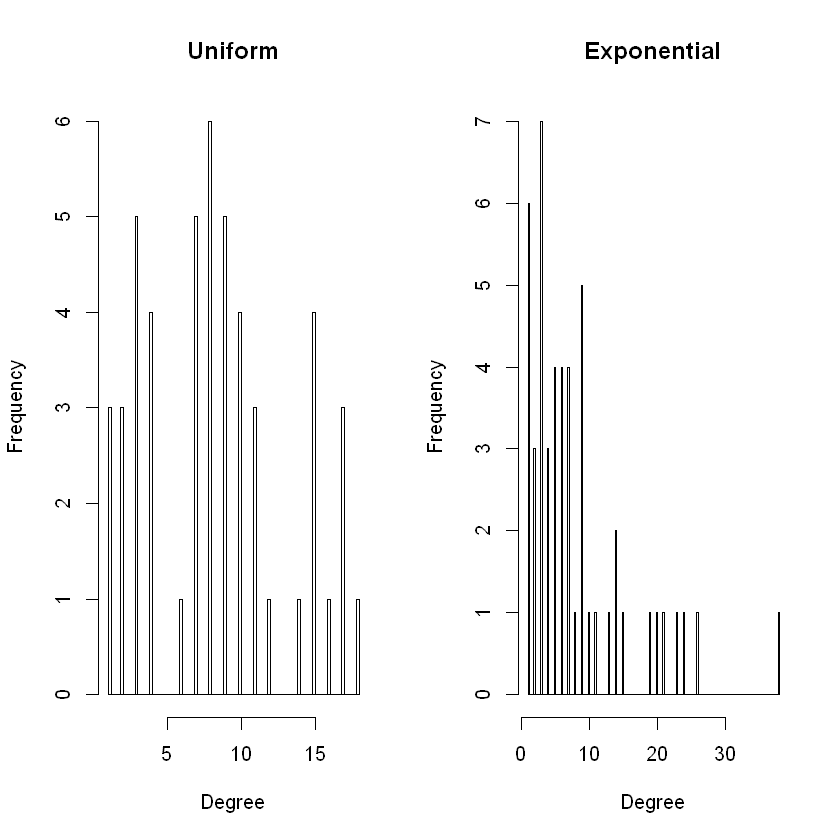

In [92]:
# Generate population graphs
poprndg <- skthrndBIG(showplot=TRUE)

In [93]:
popg_uni <- poprndg$Guniform
popg_skew <- poprndg$Gskewed

In [94]:
# mainsimBIGSIWE(popgraph,coefgamma=0,n=2,B=50)
mainsimBIGSIWE(popg_uni,coefgamma=0.5)
mainsimBIGSIWE(popg_skew,coefgamma=0.5)

gamma = 0.5 
(N,n,Omega, mean(|Omega_s|)) = 50 2 100 15.58 
                Zhatmult   ZhatPIDA Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          44.287555 34.2313417 44.057757 45.212984 42.5931344
RE against HTE  1.017313  0.6077699  1.006784  1.060273  0.9409587
gamma = 0.5 
(N,n,Omega, mean(|Omega_s|)) = 50 2 100 12.9 
                Zhatmult   ZhatPIDA  Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          66.176805 55.0987447 64.2337093 66.555111 63.4745963
RE against HTE  1.035029  0.7175041  0.9751401  1.046897  0.9522279


In [95]:
# Variance of zi_alpha for diferent choices of gamma
max.gamma <- 5
range.gamma <- seq(0,max.gamma,by=0.1)
varzi_alpha_uni <- NULL
varzi_alpha_skew <- NULL
for(tmp.gamma in range.gamma){tmp_uni <- var(zFun(popg_uni,tmp.gamma))
                              tmp_skew <- var(zFun(popg_skew,tmp.gamma))
varzi_alpha_uni <- c(varzi_alpha_uni,tmp_uni) 
varzi_alpha_skew <- c(varzi_alpha_skew,tmp_skew) }
# Gamma value which gives minimum variance
gamma.minvar_uni <- range.gamma[which(varzi_alpha_uni==min(varzi_alpha_uni))]
gamma.minvar_skew <- range.gamma[which(varzi_alpha_skew==min(varzi_alpha_skew))]
cat('gamma.minvar_uni =', gamma.minvar_uni,'\n')
cat('gamma.minvar_skew =', gamma.minvar_skew,'\n')

gamma.minvar_uni = 1.9 
gamma.minvar_skew = 2.6 


In [96]:
mainsimBIGSIWE(popg_uni,coefgamma=gamma.minvar_uni)
mainsimBIGSIWE(popg_skew,coefgamma=gamma.minvar_skew)

gamma = 1.9 
(N,n,Omega, mean(|Omega_s|)) = 50 2 100 15.58 
                Zhatmult   ZhatPIDA  Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          44.287555 19.2304342 43.8075696 45.212984 42.5931344
RE against HTE  1.017313  0.1918093  0.9953818  1.060273  0.9409587
gamma = 2.6 
(N,n,Omega, mean(|Omega_s|)) = 50 2 100 12.9 
                Zhatmult   ZhatPIDA  Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          66.176805 33.8416692 64.2337093 66.555111 63.4745963
RE against HTE  1.035029  0.2706728  0.9751401  1.046897  0.9522279


In [97]:
mainsimBIGSIWE(popg_uni,n=5,coefgamma=gamma.minvar_uni)
mainsimBIGSIWE(popg_skew,n=5,coefgamma=gamma.minvar_skew)

gamma = 1.9 
(N,n,Omega, mean(|Omega_s|)) = 50 5 100 32.88 
                Zhatmult   ZhatPIDA Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          27.839237 13.6345690 25.524097 27.175787 21.8217683
RE against HTE  1.270585  0.3047698  1.068046  1.210747  0.7806726
gamma = 2.6 
(N,n,Omega, mean(|Omega_s|)) = 50 5 100 27.3 
               Zhatmult  ZhatPIDA Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          34.03311 19.880615 33.291955 34.600923 28.6590769
RE against HTE  1.14322  0.390109  1.093969  1.181685  0.8106823


In [98]:
mainsimBIGSIWE(popg_uni,n=10,coefgamma=gamma.minvar_uni)
mainsimBIGSIWE(popg_skew,n=10,coefgamma=gamma.minvar_skew)

gamma = 1.9 
(N,n,Omega, mean(|Omega_s|)) = 50 10 100 53.6 
                Zhatmult ZhatPIDA  Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          18.795639 9.366003 14.4804966 18.216414 12.3664657
RE against HTE  1.525782 0.378867  0.9056181  1.433191  0.6604948
gamma = 2.6 
(N,n,Omega, mean(|Omega_s|)) = 50 10 100 45.64 
                Zhatmult   ZhatPIDA  Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          22.953328 14.2725217 18.6524647 23.090700 13.9676240
RE against HTE  1.359757  0.5257406  0.8979301  1.376082  0.5035182


In [99]:
mainsimBIGSIWE(popg_uni,n=20,coefgamma=gamma.minvar_uni)
mainsimBIGSIWE(popg_skew,n=20,coefgamma=gamma.minvar_skew)

gamma = 1.9 
(N,n,Omega, mean(|Omega_s|)) = 50 20 100 77.94 
                Zhatmult  ZhatPIDA Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          11.389144 5.2509766 14.424961 14.494350  14.231074
RE against HTE  2.401588 0.5105009  3.852526  3.889679   3.749658
gamma = 2.6 
(N,n,Omega, mean(|Omega_s|)) = 50 20 100 66.74 
                Zhatmult  ZhatPIDA Yhatp_rnd Yhatp_asc Yhatp_desc
MC-SD          15.068701 8.7079256 17.916780 22.060678  23.392135
RE against HTE  1.759218 0.5874858  2.487069  3.770558   4.239432
